# RUN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Step 1 to 3
Using the Scikit-Learn Library, train the Logistic Regression model to classify Probe vs. Not Probe classes using all available features. Probe class consists of all probing attacks, such as ipsweep probe, nmap probe, portsweep probe, etc. Non probe class consists of every other attack in the dataset. Make sure you split your data into train and test sets. In general, 80% for training 20% for testing is a good split.


In [2]:
df = pd.read_csv('/content/drive/MyDrive/2024 Spring/ML/Lecture 3/kddcup99_csv.csv')
y = df['label'].apply(lambda x: 0 if x == 'normal' else 1).values # convert y labels into 0 and 1 (non-probe / probe)
X = df.drop('label', axis=1) # include all other features in X

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['protocol_type'] = le.fit_transform(X['protocol_type'])
X['service'] = le.fit_transform(X['service'])
X['flag'] = le.fit_transform(X['flag'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [3]:
# Train
lr = LogisticRegression(penalty = None, max_iter=1000)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000, penalty=None)

## Step 4
Summarize your results. What is the training accuracy? What is the testing accuracy? Do you think your model overfits? How many iteration did it take to converge?




*   Without regularization, the training accuracy is about 99.740%, and the testing accuracy is about 99.757%
*   The model is not overfitted.
*   It takes 906 iterations to converge.



In [4]:
training_accuracy = lr.score(X_train_std, y_train)
print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 0.9974014209951014


In [5]:
testing_accuracy = lr.score(X_test_std, y_test)
print(f"Testing Accuracy: {testing_accuracy}")

Testing Accuracy: 0.9975709485445934


In [6]:
iterations = lr.n_iter_[0]
print(f"Iteration: {iterations}")

Iteration: 906


## Step 5
Take a look at the trained model parameters. Which features have the largest weights in absolute value? These are potentially most informative features for the trained model. Do they make sense? Why?



*   'lsu_attempted', 'lnum_compromised', and 'count' have the largest weights in absolute value.
*   After training the logistic regression model, we obtain the coefficients of each feature. The larger the absolute value, the more significant the feature is considered. Although I haven't undergone professional web security training, the top features appear to be related to anomalous sign-ups and unauthorized root access attempts, which are indicative of the likelihood of web security incidents or intrusions.



In [7]:
coefficients = lr.coef_[0]
important_features = pd.Series(coefficients, index=X_train_std.columns).abs().sort_values(ascending=False)
important_features.head()

lsu_attempted       11.464420
lnum_compromised    10.483775
count                6.739114
lnum_root            4.566920
wrong_fragment       4.410553
dtype: float64

## Step 6
Train model with L1 and L2 regularization. Compare the accuracies for L1 and L2 and plot the feature weights.




*   When using the default strength C = 1.0, the accuracy for L1 is 99.755%, and for L2, it is 99.762%, both slightly higher than when penalty = None.
*   L2 is supposed to distribute the weights more evenly across all features, but since the original model is almost perfect, there isn’t much room to enhance the accuracy.



In [8]:
# L1 Regularization
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lr_l1.fit(X_train_std, y_train)

# Accuracy
accuracy_l1 = lr_l1.score(X_test_std, y_test)
print(f"L1 Accuracy: {accuracy_l1}")

L1 Accuracy: 0.9975507064491316


In [9]:
# Train with L2 Regularization
lr_l2 = LogisticRegression(penalty='l2', max_iter=1000)
lr_l2.fit(X_train_std, y_train)

# Accuracy
accuracy_l2 = lr_l2.score(X_test_std, y_test)
print(f"L2 Accuracy: {accuracy_l2}")

L2 Accuracy: 0.9976215537832477


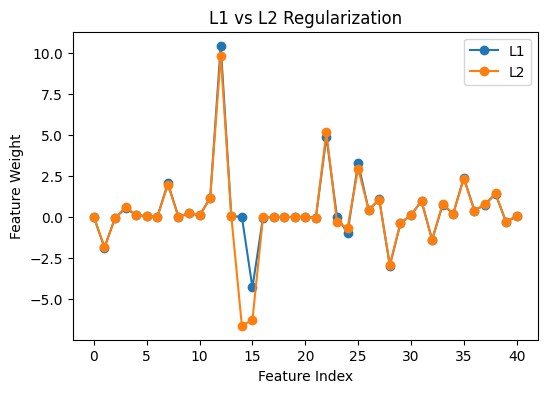

In [10]:
# Plot Feature Weights
features = range(len(lr_l1.coef_[0]))
plt.figure(figsize=(6, 4))
plt.plot(features, lr_l1.coef_[0], label='L1', marker='o')
plt.plot(features, lr_l2.coef_[0], label='L2', marker='o')
plt.xlabel('Feature Index')
plt.ylabel('Feature Weight')
plt.title('L1 vs L2 Regularization')
plt.legend()
plt.show()

## Step 7
Try different strengths for L2 regularization. (You can use values .001, .01,.1,1,10 etc.)  Show how the train and test accuracy varies with different regularization strengths. Explain your results.




*   When C = 0.001, the regularization is strong, leading to a smoother decision boundary that is more likely to fit future data well.
*   The larger the value of C, the lesser the penalty, and the model tends to fit the given data more closely, which can result in overfitting.



In [11]:
strengths = [0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []

for i in strengths:
    lr_l2 = LogisticRegression(penalty='l2', C=i, max_iter=1000)
    lr_l2.fit(X_train_std, y_train)

    # Training accuracy
    train_accuracy = lr_l2.score(X_train_std, y_train)
    train_accuracies.append(train_accuracy)

    # Test accuracy
    test_accuracy = lr_l2.score(X_test_std, y_test)
    test_accuracies.append(test_accuracy)

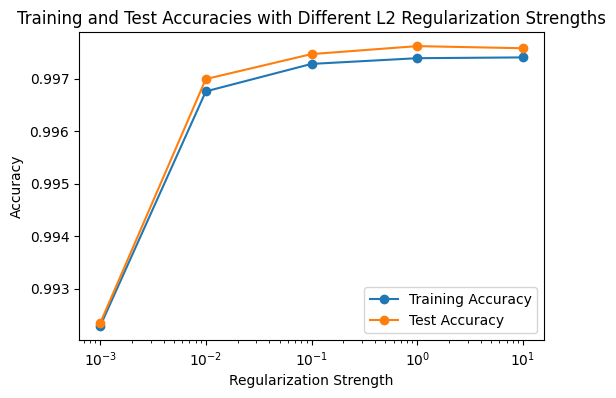

In [12]:
# Plot
plt.figure(figsize=(6, 4))
plt.semilogx(strengths, train_accuracies, label='Training Accuracy', marker='o')
plt.semilogx(strengths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies with Different L2 Regularization Strengths')
plt.legend()
plt.show()